# Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

from nltk.tokenize import sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
# from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import nltk
import yfinance as yf


In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cka/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
merc_df = pd.read_csv('./data/merck_news.csv')
merc_df['date'] = pd.to_datetime(merc_df['date'])
merc_df.set_index('date', inplace=True)
merc_df.sort_index(inplace=True)
merc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 492 entries, 2009-08-17 12:14:00+00:00 to 2020-06-11 14:22:00+00:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   492 non-null    object
 1   sentiment  492 non-null    object
dtypes: object(2)
memory usage: 11.5+ KB


In [4]:
merc = yf.Ticker('MRK')
merc_stock_df = merc.history(period='15y')
merc_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3777 entries, 2009-05-18 00:00:00-04:00 to 2024-05-17 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3777 non-null   float64
 1   High          3777 non-null   float64
 2   Low           3777 non-null   float64
 3   Close         3777 non-null   float64
 4   Volume        3777 non-null   int64  
 5   Dividends     3777 non-null   float64
 6   Stock Splits  3777 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 236.1 KB


In [5]:
# Define Merck text.
text = 'Merck (NYSE: MRK), known as MSD outside of the United States and Canada, today announced the completion of the acquisition of Harpoon Therapeutics, Inc. (Nasdaq: HARP). Harpoon is now a wholly-owned subsidiary of Merck, and Harpoon’s common stock will no longer be publicly traded or listed on the Nasdaq Stock Market. Harpoon’s lead candidate, MK-6070 (formerly known as HPN328), is a T-cell engager targeting delta-like ligand 3 (DLL3), an inhibitory canonical Notch ligand that is expressed at high levels in small cell lung cancer (SCLC) and neuroendocrine tumors. The safety, tolerability and pharmacokinetics of MK-6070 is currently being evaluated as monotherapy in a Phase 1/2 clinical trial (NCT04471727) in certain patients with advanced cancers associated with expression of DLL3. The study is also evaluating MK-6070 in combination with atezolizumab in certain patients with SCLC. In March 2022, the U.S. Food and Drug Administration (FDA) granted Orphan Drug Designation to MK-6070 for the treatment of SCLC.'
print(text)

Merck (NYSE: MRK), known as MSD outside of the United States and Canada, today announced the completion of the acquisition of Harpoon Therapeutics, Inc. (Nasdaq: HARP). Harpoon is now a wholly-owned subsidiary of Merck, and Harpoon’s common stock will no longer be publicly traded or listed on the Nasdaq Stock Market. Harpoon’s lead candidate, MK-6070 (formerly known as HPN328), is a T-cell engager targeting delta-like ligand 3 (DLL3), an inhibitory canonical Notch ligand that is expressed at high levels in small cell lung cancer (SCLC) and neuroendocrine tumors. The safety, tolerability and pharmacokinetics of MK-6070 is currently being evaluated as monotherapy in a Phase 1/2 clinical trial (NCT04471727) in certain patients with advanced cancers associated with expression of DLL3. The study is also evaluating MK-6070 in combination with atezolizumab in certain patients with SCLC. In March 2022, the U.S. Food and Drug Administration (FDA) granted Orphan Drug Designation to MK-6070 for t

In [6]:
merc_stock_df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
merc_stock_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2009-05-18 00:00:00-04:00,14.572342,14.680454,14.350427,14.646314,15679023
2009-05-19 00:00:00-04:00,14.646309,14.737349,14.395943,14.663379,16363053
2009-05-20 00:00:00-04:00,14.782870,15.050305,14.674759,14.845462,16231005
2009-05-21 00:00:00-04:00,14.640618,14.902362,14.458535,14.862532,23725567
2009-05-22 00:00:00-04:00,14.879606,14.993408,14.777184,14.890986,15340100


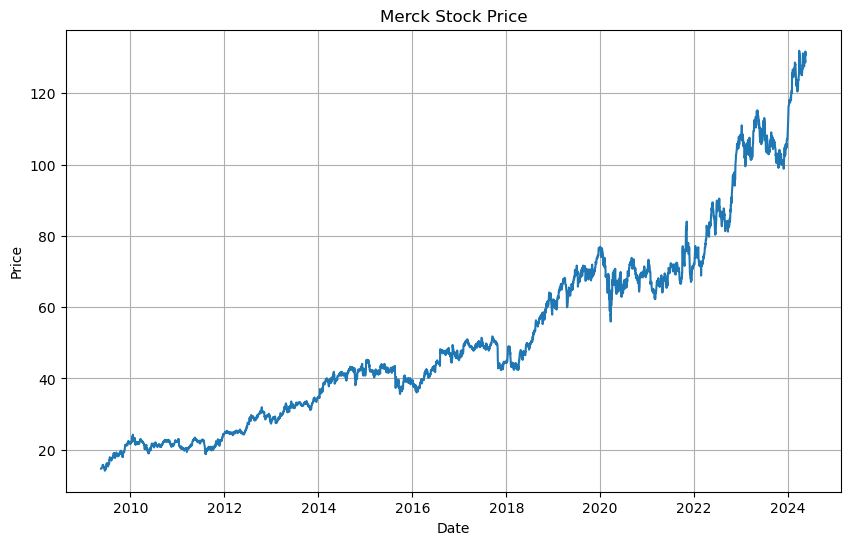

In [7]:
# line plot for merc stocks
plt.figure(figsize=(10, 6))
plt.plot(merc_stock_df['Close'])
plt.title('Merck Stock Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True)
plt.savefig('./images/merc_stock_price_2010_2024.png')

In [8]:
df_2011_2012 = merc_df.loc['2011':'2012']

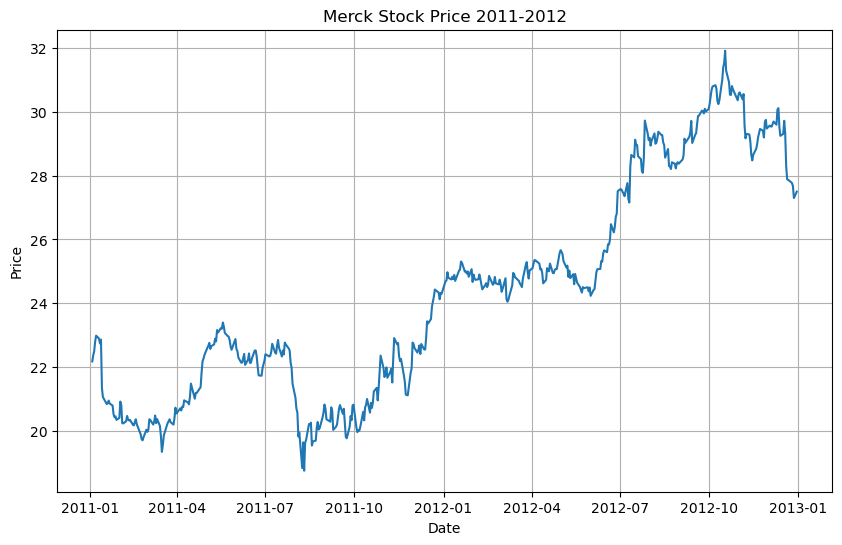

In [9]:
merc_stock_df_2011_2012 = merc_stock_df.loc['2011':'2012']
# line chart for stock price
plt.figure(figsize=(10, 6))
plt.plot(merc_stock_df_2011_2012['Close'])
plt.title('Merck Stock Price 2011-2012')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True)
plt.savefig('./images/merc_stock_price_2011_2012.png')


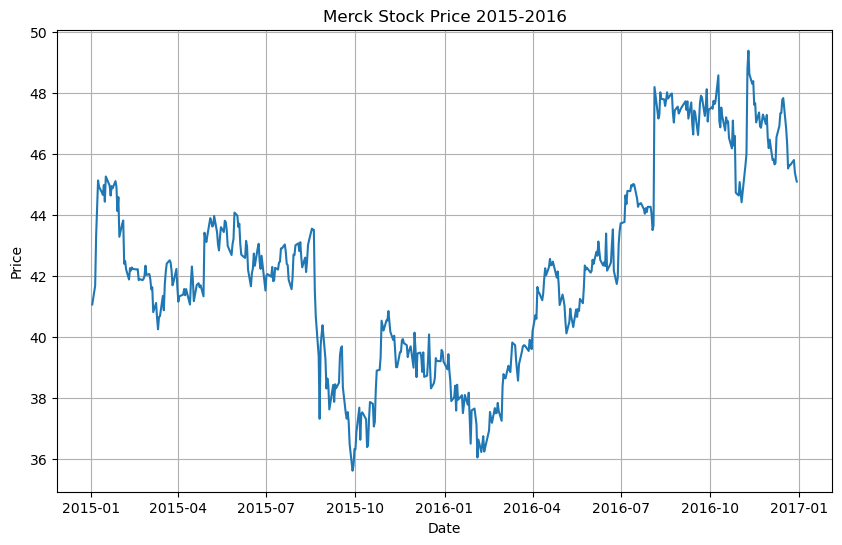

In [10]:
merc_stock_df_2015_2016 = merc_stock_df.loc['2015':'2016']
# line chart for stock price
plt.figure(figsize=(10, 6))
plt.plot(merc_stock_df_2015_2016['Close'])
plt.title('Merck Stock Price 2015-2016')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True)
plt.savefig('./images/merc_stock_price_2015_2016.png')


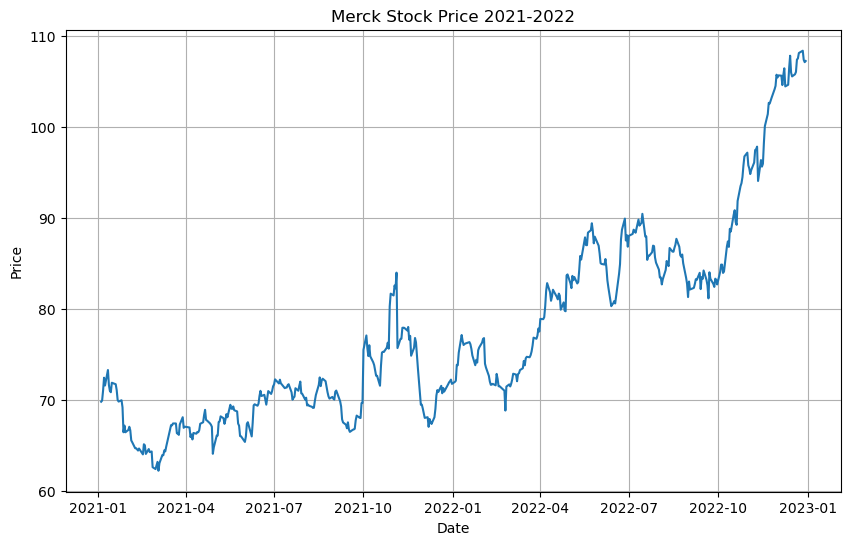

In [11]:
merc_stock_df_2021_2022 = merc_stock_df.loc['2021':'2022']
# line chart for stock price
plt.figure(figsize=(10, 6))
plt.plot(merc_stock_df_2021_2022['Close'])
plt.title('Merck Stock Price 2021-2022')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True)
plt.savefig('./images/merc_stock_price_2021_2022.png')

# Pre-Processing 

- Remove special characters
- Tokenizing
- Lemmatizing/Stemming
- Stop word removal

In [12]:
# sentence tokenizer  ## May affect NER
headlines = sent_tokenize(text.lower())

In [13]:
# # word tokenizer 
# word_tokenize(text.lower())

## Lemmatizing & Stemming

**Lemmatizing** and **stemming** are two forms of shortening words so we can combine similar forms of the same word.

When we "**lemmatize**" data, we take words and attempt to return their *lemma*, or the base/dictionary form of a word.

In [14]:
# Instantiate RegExp Tokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

# "Run" Tokenizer
text_tokens = tokenizer.tokenize(text.lower())

In [15]:
# Instantiate lemmatizer. 
lemmatizer = WordNetLemmatizer()

In [16]:
# Lemmatize tokens.
tokens_lem = [lemmatizer.lemmatize(i) for i in text_tokens]

In [17]:
# Compare tokens to lemmatized version.
# list(zip(text_tokens, tokens_lem))

# Print only those lemmatized tokens that are different.
[(text_tokens[i], tokens_lem[i]) for i in range(len(text_tokens)) if text_tokens[i] != tokens_lem[i]]

[('as', 'a'),
 ('states', 'state'),
 ('therapeutics', 'therapeutic'),
 ('as', 'a'),
 ('levels', 'level'),
 ('tumors', 'tumor'),
 ('as', 'a'),
 ('patients', 'patient'),
 ('cancers', 'cancer'),
 ('patients', 'patient')]

## Stop Word Removal

In [20]:
# Remove stopwords from "text_tokens."
no_stop_words = [token for token in text_tokens if token not in stopwords.words('english')]


In [21]:
# Check it
print(no_stop_words)

['merck', '(nyse:', 'mrk', '),', 'known', 'msd', 'outside', 'united', 'states', 'canada', ',', 'today', 'announced', 'completion', 'acquisition', 'harpoon', 'therapeutics', ',', 'inc', '.', '(nasdaq:', 'harp', ').', 'harpoon', 'wholly', '-owned', 'subsidiary', 'merck', ',', 'harpoon', '’s', 'common', 'stock', 'longer', 'publicly', 'traded', 'listed', 'nasdaq', 'stock', 'market', '.', 'harpoon', '’s', 'lead', 'candidate', ',', 'mk', '-6070', '(formerly', 'known', 'hpn328', '),', '-cell', 'engager', 'targeting', 'delta', '-like', 'ligand', '3', '(dll3),', 'inhibitory', 'canonical', 'notch', 'ligand', 'expressed', 'high', 'levels', 'small', 'cell', 'lung', 'cancer', '(sclc)', 'neuroendocrine', 'tumors', '.', 'safety', ',', 'tolerability', 'pharmacokinetics', 'mk', '-6070', 'currently', 'evaluated', 'monotherapy', 'phase', '1', '/2', 'clinical', 'trial', '(nct04471727)', 'certain', 'patients', 'advanced', 'cancers', 'associated', 'expression', 'dll3', '.', 'study', 'also', 'evaluating', 'm

# ************************************************